## THIAW Mouhamadou Lamine Bara

#                 Computer Problem Set 2.1 
# The Black-Scholes hedging strategy

In [287]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm 

In [288]:
def brownian_motion(n,T):
    delta_T=T/n
    Zi=np.sqrt(delta_T)*np.random.randn(n)
    brownian=np.zeros(n+1,)
    brownian[1:]=np.cumsum(Zi)
    return brownian

In [289]:
def discrete_path_St(n,T,sigma,mu,So):
    W=brownian_motion(n,T)
    interval=np.linspace(0,T,n+1)
    St=So*np.exp((mu-0.5*sigma**2)*interval +sigma*W)
    return St

In [290]:
T=1.5
number_of_samples=1000
So=100
n=200
sigma=0.3
r=0.05
t_values=np.linspace(0,T,n+1)
mu_values=[0.02,0.05,0.45]


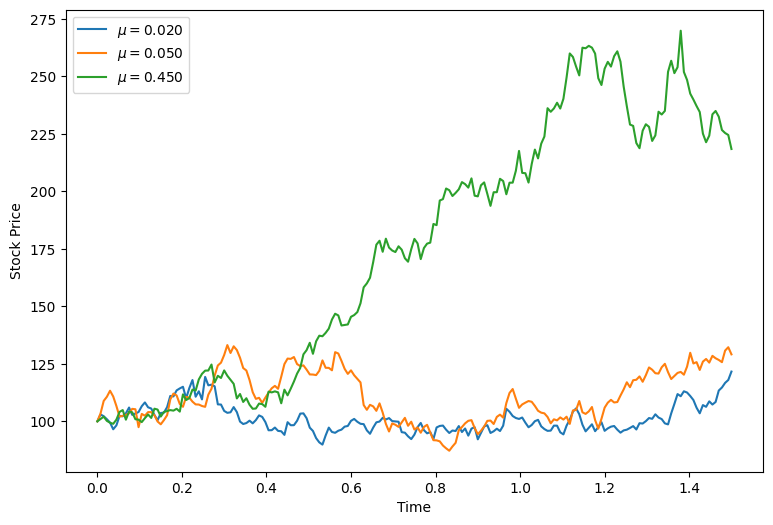

In [291]:
samples=[]
fig,ax=plt.subplots(1,1,figsize=(9,6))
for mu in mu_values:
    samples.append([discrete_path_St(n,T,sigma,mu,So) for sample in range(number_of_samples)])
    ax.plot(t_values,samples[-1][0],label=r"$\mu=%.3f$"%mu)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Stock Price')
plt.show()

Let's compute corresponding mean and variance

In [292]:
samples=np.array(samples)

In [293]:
for idx, drift_rate in enumerate(mu_values):
    print(f"Pour la valeur de dérive {idx + 1}: mu= {drift_rate:.3f}")
    sample_mean = np.mean(samples[idx, :, -1])
    sample_variance = np.var(samples[idx, :, -1], ddof=1)
    print(f"Moyenne de l'échantillon S_T : {sample_mean:.4f}")
    print(f"Variance de l'échantillon S_T : {sample_variance:.4f}")
    print("------------------------------------")


Pour la valeur de dérive 1: mu= 0.020
Moyenne de l'échantillon S_T : 104.4665
Variance de l'échantillon S_T : 1554.4300
------------------------------------
Pour la valeur de dérive 2: mu= 0.050
Moyenne de l'échantillon S_T : 105.4694
Variance de l'échantillon S_T : 1526.9231
------------------------------------
Pour la valeur de dérive 3: mu= 0.450
Moyenne de l'échantillon S_T : 195.2053
Variance de l'échantillon S_T : 5361.8826
------------------------------------


Commentaires: Plus la valeur de $\mu$ augmente, plus la moyenne de l'échantillon St et sa variance augmentent.

Essayons de vérifier celà analytiquement;
[A compléter]

Question 2

In [294]:
def d_plus(s,k,v):
    return np.log(s/k)/np.sqrt(v) +0.5*np.sqrt(v)

def d_moins(s,k,v):
    return np.log(s/k)/np.sqrt(v) -0.5*np.sqrt(v)

def BS(So,K,T,sigma):
    s=So
    k=K*np.exp(-r*T)
    v=T*sigma**2
    return s*norm.cdf(d_plus(s,k,v)) - k*norm.cdf(d_moins(s,k,v))

def delta(St,K,T,t,sigma,r=0.05):
    in_the_norm=d_plus(St,K*np.exp(-r*(T-t)),(T-t)*sigma**2)
    return norm.cdf(in_the_norm)

def xtn(n,T,K,S0, mu, sigma, r=0.05):
    bs=BS(So,K,T,sigma)
    t_values=np.linspace(0,T,n+1)
    t_values_to_take=t_values[:-1]
    t_values=t_values[1:]
    deltas=delta(S0,K,T,t_values_to_take,sigma,r=0.05)
    St = discrete_path_St(n, T, mu, sigma, S0)
    St_firsts=St[:-1]
    St=St[1:]
    xt=np.sum(deltas*(np.exp(-r*t_values)*St-np.exp(-r*t_values_to_take)*St_firsts),axis=0)
    xt+=bs
    xt*=np.exp(r*T)
    return xt


In [295]:

number_of_samples=1000
So=100
n=200
sigma=0.3

t_values=np.linspace(0,T,n+1)
mu_values=[0.02,0.05,0.45]
K_values = list(range(80,121))

In [296]:
samples=[]
for K in K_values:
    #print("Pour la valeur de K=%.2f"%K)
    K_samples=[]
    for mu in mu_values:
        K_samples.append([xtn(n,T,K,So,mu,sigma,r=0.05) for i in range(number_of_samples)])
    samples.append(K_samples)    

In [297]:
samples=np.array(samples)


In [298]:
all_means=samples.mean(axis=2)


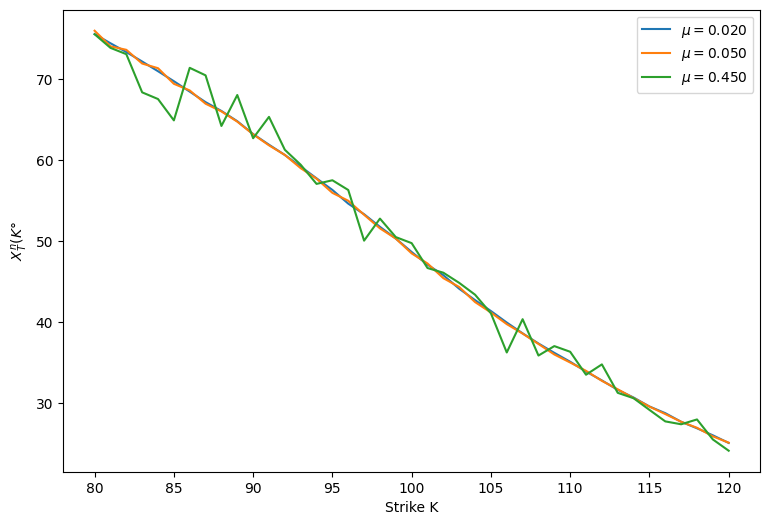

In [299]:
fig,ax=plt.subplots(1,1,figsize=(9,6))
for idx, drift_rate in enumerate(mu_values):
    ax.plot(K_values,all_means[:,idx],label=r"$\mu=%.3f$"%drift_rate)
ax.legend()
ax.set_xlabel('Strike K')
ax.set_ylabel('$X_T^n(K°$')
plt.show()

# Computing profit and loss

In [300]:
def profit_and_loss(n,T,K,S0, mu, sigma, r=0.05):
    bs=BS(So,K,T,sigma)
    t_values=np.linspace(0,T,n+1)
    t_values_to_take=t_values[:-1]
    t_values=t_values[1:]
    deltas=delta(S0,K,T,t_values_to_take,sigma,r=0.05)
    St = discrete_path_St(n, T, mu, sigma, S0)
    S_T=St[-1]
    St_firsts=St[:-1]
    St=St[1:]
    xt=np.sum(deltas*(np.exp(-r*t_values)*St-np.exp(-r*t_values_to_take)*St_firsts),axis=0)
    xt+=bs
    xt*=np.exp(r*T)
    pl=xt-max(0,S_T-K)
    return xt   
    

In [301]:
n_values=[2**7,2**8,2**9,2**10]
number_of_samples=1000

In [302]:
profit_loss_sample=[]
for n in n_values:
    n_sample=[]
    for K in K_values:
        print("  pour la valeur K=%.3f" % K, end='')
        for mu in mu_values:
             K_samples.append([profit_and_loss(n,T,K,So,mu,sigma,r=0.05) for i in range(number_of_samples)])
        n_sample.append(K_samples)
    profit_loss_sample.append(K_samples)    

  pour la valeur K=80.000  pour la valeur K=81.000  pour la valeur K=82.000  pour la valeur K=83.000  pour la valeur K=84.000  pour la valeur K=85.000  pour la valeur K=86.000  pour la valeur K=87.000  pour la valeur K=88.000  pour la valeur K=89.000  pour la valeur K=90.000  pour la valeur K=91.000  pour la valeur K=92.000  pour la valeur K=93.000  pour la valeur K=94.000  pour la valeur K=95.000  pour la valeur K=96.000  pour la valeur K=97.000  pour la valeur K=98.000  pour la valeur K=99.000  pour la valeur K=100.000  pour la valeur K=101.000  pour la valeur K=102.000  pour la valeur K=103.000  pour la valeur K=104.000  pour la valeur K=105.000  pour la valeur K=106.000  pour la valeur K=107.000  pour la valeur K=108.000  pour la valeur K=109.000  pour la valeur K=110.000  pour la valeur K=111.000  pour la valeur K=112.000  pour la valeur K=113.000  pour la valeur K=114.000  pour la valeur K=115.000  pour la valeur K=116.000  pour la valeur K=117.000  pour la valeur K=118.000  pour

In [303]:
profit_loss_sample=np.array(profit_loss_sample)
profit_loss_sample.shape

(4, 495, 1000)